# Cifar-10 이미지 분류
### 출처: [Keras Doucmentation](https://keras.io/examples/cifar10_cnn/)

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# 나중에 지정될 변수의 값을 미리 세팅
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 50
DATA_AUGMENTATION = True
NUM_PREDICTIONS = 20
SAVE_DIR = os.path.join(os.getcwd(), 'model')
MODEL_NAME = 'keras_cifar10_trained_model.h5'

In [6]:
# The data, split between train and test sets:
(x_train, y_train0), (x_test, y_test0) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 53s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### 데이터 확인

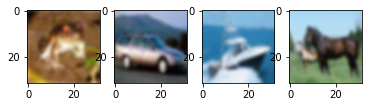

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [5]:
y_train0[0]

array([6], dtype=uint8)

In [10]:
# 자료형을 실수로 변환한 후 정규화
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [11]:
# Convert class vectors to binary class matrices.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train0, NUM_CLASSES)
y_test = to_categorical(y_test0, NUM_CLASSES)

In [12]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

#### 모형 구현

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)         

In [33]:
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [30]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
modelpath = "model/cifar10-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

### 훈련 셋의 데이터가 너무 많아 테스트 셋을 훈련용과 테스트용으로 사용

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
    train_test_split(x_test, y_test, stratify=y_test,
                     test_size=.2, random_state=seed)

In [34]:
model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks=[early_stopping_callback, checkpointer])

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 17s 2ms/step - loss: 1.4960 - accuracy: 0.4541 - val_loss: 1.5475 - val_accuracy: 0.4410

Epoch 00001: val_loss improved from 1.57269 to 1.54755, saving model to model/cifar10-cnn-01-1.5475.hdf5
Epoch 2/50
8000/8000 [==============================] - 17s 2ms/step - loss: 1.4632 - accuracy: 0.4671 - val_loss: 1.5531 - val_accuracy: 0.4380

Epoch 00002: val_loss did not improve from 1.54755
Epoch 3/50
8000/8000 [==============================] - 17s 2ms/step - loss: 1.4353 - accuracy: 0.4826 - val_loss: 1.4432 - val_accuracy: 0.4845

Epoch 00003: val_loss improved from 1.54755 to 1.44319, saving model to model/cifar10-cnn-03-1.4432.hdf5
Epoch 4/50
8000/8000 [==============================] - 17s 2ms/step - loss: 1.4046 - accuracy: 0.4956 - val_loss: 1.3956 - val_accuracy: 0.4950

Epoch 00004: val_loss improved from 1.44319 to 1.39565, saving model to model/cifar10-cnn-04-1.3956.hdf5
Ep

8000/8000 [==============================] - 16s 2ms/step - loss: 0.8250 - accuracy: 0.7072 - val_loss: 1.1272 - val_accuracy: 0.6300

Epoch 00036: val_loss did not improve from 1.09658
Epoch 37/50
8000/8000 [==============================] - 17s 2ms/step - loss: 0.8239 - accuracy: 0.7080 - val_loss: 1.0981 - val_accuracy: 0.6295

Epoch 00037: val_loss did not improve from 1.09658
Epoch 38/50
8000/8000 [==============================] - 17s 2ms/step - loss: 0.8087 - accuracy: 0.7228 - val_loss: 1.0990 - val_accuracy: 0.6270

Epoch 00038: val_loss did not improve from 1.09658
Epoch 39/50
8000/8000 [==============================] - 17s 2ms/step - loss: 0.7951 - accuracy: 0.7243 - val_loss: 1.0977 - val_accuracy: 0.6335

Epoch 00039: val_loss did not improve from 1.09658
Epoch 40/50
8000/8000 [==============================] - 17s 2ms/step - loss: 0.7900 - accuracy: 0.7234 - val_loss: 1.1174 - val_accuracy: 0.6210

Epoch 00040: val_loss did not improve from 1.09658
Epoch 41/50
8000/8000 

In [35]:
from keras.models import load_model
#del model
#model = load_model('model/cifar10-cnn-35-1.0966.hdf5')

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [37]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2000/2000 [==============================] - 0s 248us/step
Test loss: 1.0970209636688233
Test accuracy: 0.6345000267028809


## Using data augmentation

In [44]:
del model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)         

In [45]:
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [46]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [47]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,    # epsilon for ZCA whitening
    rotation_range=0,     # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,   # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,   # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

In [48]:
modelpath = "model/cifar10-aug-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

In [49]:
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train, Y_train, 
                                 batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping_callback, checkpointer])
                    #workers=4)

Epoch 1/50
250/250 [==============================] - 17s 67ms/step - loss: 2.2419 - accuracy: 0.1520 - val_loss: 2.0346 - val_accuracy: 0.2715

Epoch 00001: val_loss improved from inf to 2.03458, saving model to model/cifar10-aug-01-2.0346.hdf5
Epoch 2/50
  2/250 [..............................] - ETA: 15s - loss: 1.9590 - accuracy: 0.2344

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


250/250 [==============================] - 16s 66ms/step - loss: 1.9695 - accuracy: 0.2744 - val_loss: 1.8350 - val_accuracy: 0.3360

Epoch 00002: val_loss improved from 2.03458 to 1.83504, saving model to model/cifar10-aug-02-1.8350.hdf5
Epoch 3/50
250/250 [==============================] - 16s 66ms/step - loss: 1.8442 - accuracy: 0.3266 - val_loss: 1.7399 - val_accuracy: 0.3715

Epoch 00003: val_loss improved from 1.83504 to 1.73989, saving model to model/cifar10-aug-03-1.7399.hdf5
Epoch 4/50
250/250 [==============================] - 16s 66ms/step - loss: 1.7856 - accuracy: 0.3579 - val_loss: 1.7141 - val_accuracy: 0.3825

Epoch 00004: val_loss improved from 1.73989 to 1.71413, saving model to model/cifar10-aug-04-1.7141.hdf5
Epoch 5/50
250/250 [==============================] - 16s 66ms/step - loss: 1.7393 - accuracy: 0.3638 - val_loss: 1.6453 - val_accuracy: 0.3975

Epoch 00005: val_loss improved from 1.71413 to 1.64528, saving model to model/cifar10-aug-05-1.6453.hdf5
Epoch 6/50


250/250 [==============================] - 17s 67ms/step - loss: 1.1601 - accuracy: 0.5889 - val_loss: 1.1610 - val_accuracy: 0.5915

Epoch 00038: val_loss did not improve from 1.10121
Epoch 39/50
250/250 [==============================] - 17s 67ms/step - loss: 1.1604 - accuracy: 0.5893 - val_loss: 1.0835 - val_accuracy: 0.6290

Epoch 00039: val_loss improved from 1.10121 to 1.08352, saving model to model/cifar10-aug-39-1.0835.hdf5
Epoch 40/50
250/250 [==============================] - 17s 67ms/step - loss: 1.1322 - accuracy: 0.5981 - val_loss: 1.1620 - val_accuracy: 0.5955

Epoch 00040: val_loss did not improve from 1.08352
Epoch 41/50
250/250 [==============================] - 17s 67ms/step - loss: 1.1332 - accuracy: 0.5960 - val_loss: 1.0400 - val_accuracy: 0.6260

Epoch 00041: val_loss improved from 1.08352 to 1.03997, saving model to model/cifar10-aug-41-1.0400.hdf5
Epoch 42/50
250/250 [==============================] - 17s 66ms/step - loss: 1.1353 - accuracy: 0.5944 - val_loss: 1

In [50]:
#del model
model2 = load_model('model/cifar10-aug-48-1.0113.hdf5')

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [52]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2000/2000 [==============================] - 0s 247us/step
Test loss: 1.034683611869812
Test accuracy: 0.6474999785423279
